# Exploratory Data Analysis
## EDA and its 10 steps

In [4]:
# Import Libararies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load data sets
df = sns.load_dataset('titanic')
df1 = sns.load_dataset('tips')

In [5]:
# step-1 Data shape
print(df.shape)
rows, cols = df.shape
print('Number of rows: ', rows) # instances
print('Number of cols: ', cols) # series

(891, 15)
Number of rows:  891
Number of cols:  15


In [6]:
# step-2 Data Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
# step-3 find missing values
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
# percent calculation of missing values
df.isnull().sum() / df.shape[0] * 100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [9]:
# percent calculation of missing values
df1.isnull().sum() / df1.shape[0] * 100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [10]:
# step-4 split variables for new columns needed/ feature engineering
city = pd.DataFrame(np.array([['Lahore, Pakistan',67, 100],['Beijing, cchina', 5,6],['berlin, Germany',8,9]]),
                            columns=['address','males','females'])
city

,address,males,females
0,"Lahore, Pakistan",67,100
1,"Beijing, cchina",5,6
2,"berlin, Germany",8,9


In [11]:
city[['city', 'country']]= city['address'].str.split(',',expand=True)
city                            

,address,males,females,city,country
0,"Lahore, Pakistan",67,100,Lahore,Pakistan
1,"Beijing, cchina",5,6,Beijing,cchina
2,"berlin, Germany",8,9,berlin,Germany


In [12]:
# type casting / conversion of dtype
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      object
 2   females  3 non-null      object
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: object(5)
memory usage: 248.0+ bytes


In [13]:
# to convert into an int
city[['males','females']]= city[['males','females']].astype('int64')
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      int64 
 2   females  3 non-null      int64 
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 248.0+ bytes


In [14]:
# to convert into an str
city[['city','country']]= city[['city','country']].astype('str') #bool #flot
city.info()
# why the info dtype is not changing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  3 non-null      object
 1   males    3 non-null      int64 
 2   females  3 non-null      int64 
 3   city     3 non-null      object
 4   country  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 248.0+ bytes


In [15]:
# step-6 summary statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# step-7 value count of a specific column
df['age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: age, Length: 88, dtype: int64

In [17]:
# step-7 value count of a specific column
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [18]:
# step-7 value count of a specific column
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [19]:
# finding unique values in columns/series
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [20]:
# step-8 Deal with duplicates (remove)/ and/or null values (mean, median...other methods)
df[df.embark_town == 'Queenstown'] #this will show the people only embarked from Queenstown in Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
16,0,3,male,2.0,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False
22,1,3,female,15.0,0,0,8.0292,Q,Third,child,False,NaN,Queenstown,yes,True
28,1,3,female,NaN,0,0,7.8792,Q,Third,woman,False,NaN,Queenstown,yes,True
32,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,0,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True
825,0,3,male,NaN,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True
828,1,3,male,NaN,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False


<AxesSubplot:xlabel='age', ylabel='Count'>

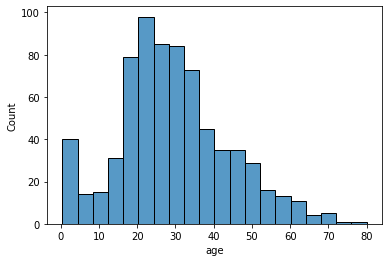

In [21]:
# step-9 check the normality / STandard normal distribution
sns.histplot(df['age']) # how to make histplot for two cat variable for a continuos one

In [22]:
# measure its skewness and kurtosis
df['age'].agg(['skew', 'kurtosis']).transpose()

skew        0.389108
kurtosis    0.178274
Name: age, dtype: float64

c:\Users\hp\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

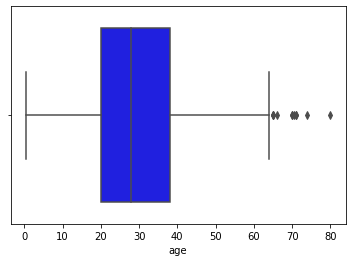

In [23]:
sns.boxplot(df['age'], color='blue')

In [24]:
# step-10 correlation
corr = df.corr(method='pearson') # you can spearman if you vant
corr
# this will display a correlation matrix

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

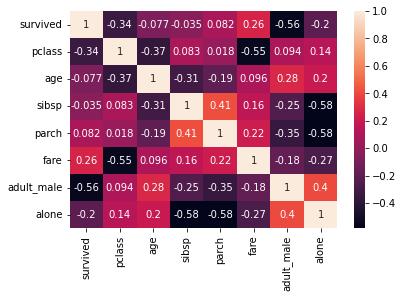

In [25]:
sns.heatmap(corr, annot=True)
# this will show the numbers with colors

In [26]:
pip install Jinja2


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [27]:
corr.style.background_gradient(cmap='coolwarm')

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000
